###🤖 2. Previsão de Preço de Imóveis com Regressão Linear

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [4]:
#Importando dataset das casas e o pandas
from sklearn.datasets import fetch_california_housing
import pandas as pd


In [6]:
#Carregando o dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#Olhar os valores faltantes
print(df.isnull().sum())

#Estátisticas gerais de cada variavel
print(df.describe())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mea

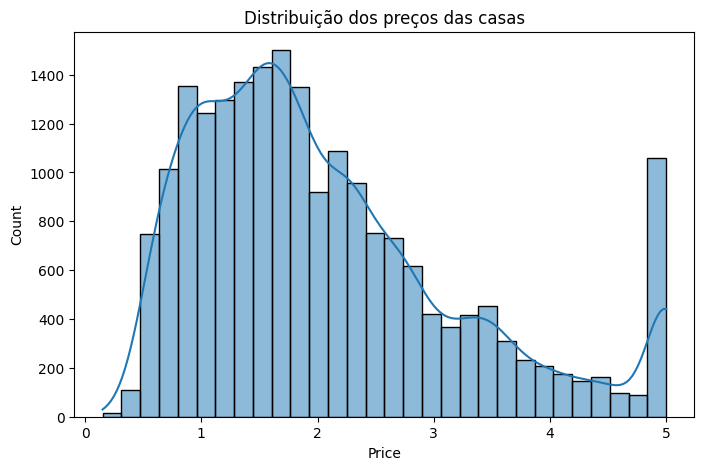

In [13]:
#Ver a distribuição dos preços
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribuição dos preços das casas")
plt.show()

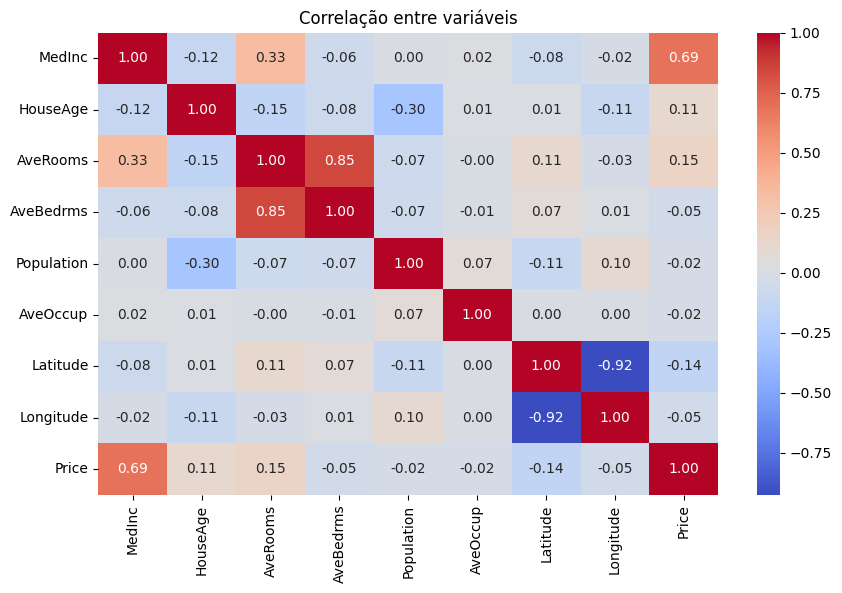

In [16]:
#Matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre variáveis")
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

#Escolhendo as variáveis mais "importantes"
features = ["MedInc", "AveRooms", "HouseAge", "AveOccup", "Latitude", "Longitude", "AveBedrms"]
x = df[features]
y = df['Price']

#Dividir em 80% treino e 20% teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Tamanho do treino: {x_train.shape}")
print(f"Tamanho do teste: {x_test.shape}")

Tamanho do treino: (16512, 7)
Tamanho do teste: (4128, 7)


In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"Intercepto: {model.intercept_:.4f}")

MedInc: 0.4487
AveRooms: -0.1233
HouseAge: 0.0098
AveOccup: -0.0035
Latitude: -0.4195
Longitude: -0.4335
AveBedrms: 0.7832
Intercepto: -37.0114


In [32]:
from sklearn.metrics import mean_absolute_error, r2_score

#Fazer as previsões

y_pred = model.predict(x_test)

#Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"Erro médio absoluto (MAE): {mae:.4f}")

R²: 0.5757
Erro médio absoluto (MAE): 0.5332


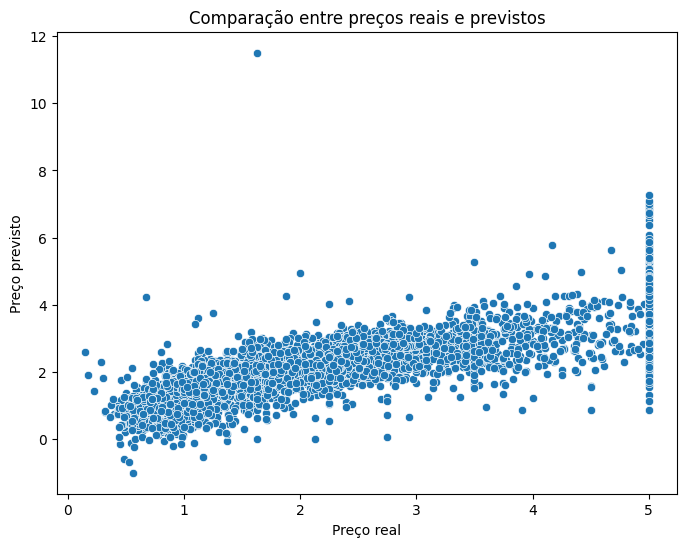

In [33]:
#Visualizando as previsões
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("Comparação entre preços reais e previstos")
plt.show()